# Maps of affectation

## Libraries

In [85]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd

import datetime
d = datetime.datetime(2023, 1, 9, 18, 50, 0)
from datetime import datetime

## Network Map

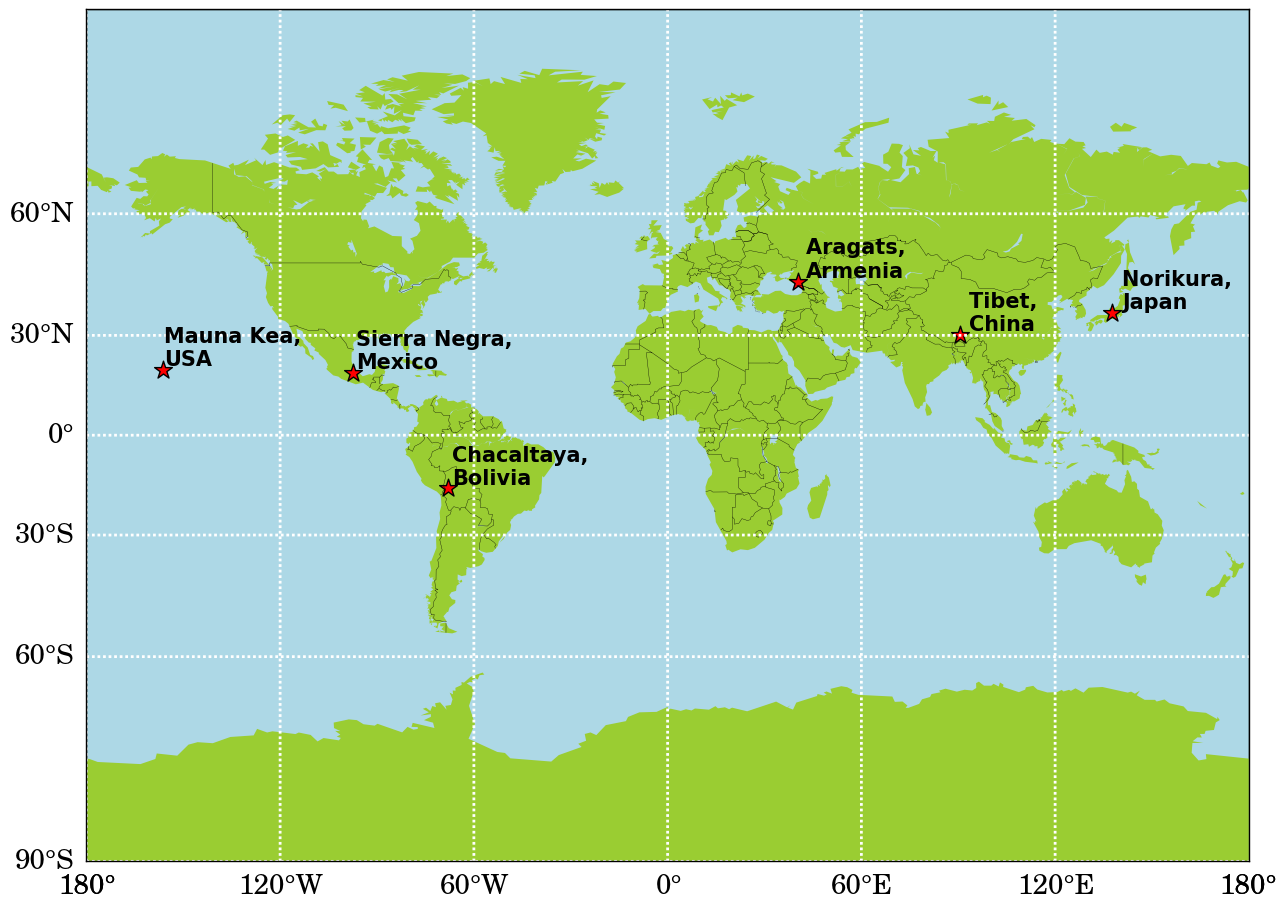

In [2]:
# Special thx to:
# https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot

fig0 = plt.figure(figsize = (15,20))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0])

map = Basemap(projection = 'mill', lon_0 = 0)# Miller projection
# map.bluemarble() Mapa chingón pero pesado
map.drawcoastlines(linewidth = 0)
map.drawcountries(linewidth=0.25)
map.drawparallels(np.arange(-90, 90, 30), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'w', linewidth = 2)
map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'w', linewidth = 2)
map.fillcontinents(color='yellowgreen', lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
# CS=map.nightshade(d, color = 'slategray', alpha = 0.4)# Shade the night areas

# lats, lons, obs
coords = [
          [-97.3, 19.0, 'Sierra Negra, \nMexico'], 
          [-68.0, -16.2, 'Chacaltaya, \nBolivia'],
          [137.5, 36.1, 'Norikura, \nJapan'],
          [40.5, 44.2, 'Aragats, \nArmenia'],
          [-156.3, 19.8, 'Mauna Kea, \nUSA'],
          [90.5, 30, 'Tibet, \nChina'],
#           [7.8, 40.6, 'Gornergrat, \nSwitzerland']
         ]

for lat, lon, obs in coords:
    x,y = map(lat, lon)
    map.scatter(x, y, color = 'red', marker = '*', s = 180, edgecolor = 'k')
    plt.text(x*(1 + 0.01), y*(1 + 0.01), obs, color = 'black',
             fontsize = 15, fontweight = 'bold')
# plt.title('Day/Night Map for %s (UT)' % d.strftime("%d %b %Y %H:%M:%S"),
# plt.title(f'SNT Network on {d.strftime("%b %d, %Y %H:%M:%S")} (UT)',
#       fontsize = 30, fontweight = 'bold', color = "black", fontname = 'C059')
# plt.ylabel('Long. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 
# plt.xlabel('Lat. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 

# plt.savefig('SNT_Network_Map.png', dpi = 'figure', bbox_inches= 'tight')
# Special thx to : https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph
# plt.savefig('SNT_Network_Map.pdf')
# !pdftoppm -png -r 300 SNT_Network_Map.pdf SNT_Network_Map
# !rm SNT_Network_Map.pdf

plt.show()

## Specific area map

ValueError: Filled contours require at least 2 levels.

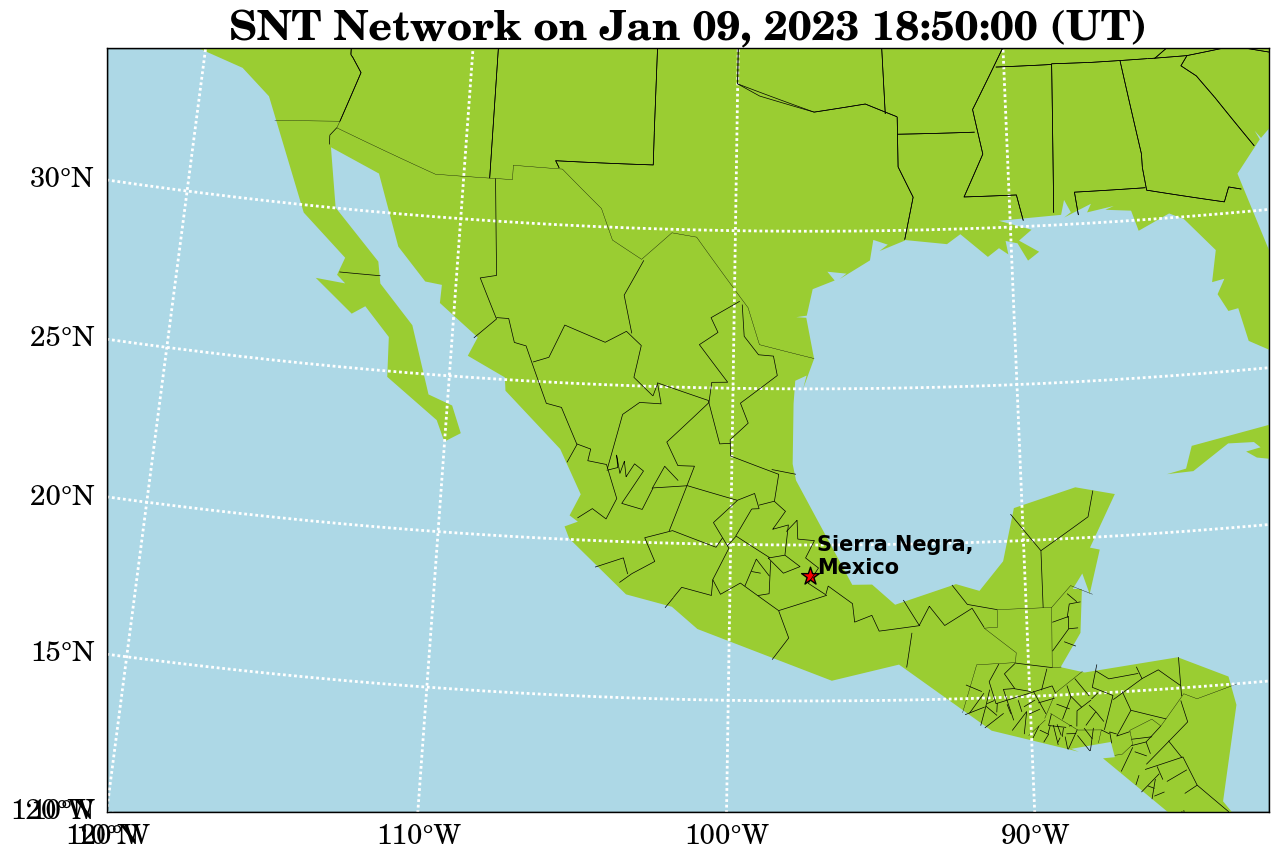

In [3]:
# Special thx to:
# https://youtu.be/xFGYQJwUcck

fig0 = plt.figure(figsize = (15,20))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0])

lowlon = -120 # lower corner longitude
lowlat = 10 # lower corner latitude
upplon = -80 # upper corner longitude
upplat = 35 # upper corner latitude

map = Basemap(llcrnrlon = lowlon,
              llcrnrlat = lowlat,
              urcrnrlon = upplon,
              urcrnrlat = upplat,
              projection = 'lcc', # Lambert conformal projection
              lat_0 = 19, # center lat
              lon_0 = -97.3 # center lon
             )
map.drawcoastlines(linewidth = 0)
map.drawcountries(linewidth=0.25)
map.drawparallels(np.arange(lowlat, upplat, 5), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'w', linewidth = 2)
map.drawmeridians(np.arange(lowlon, upplon, 10),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'w', linewidth = 2, ax = ax0)
map.drawstates(ax = ax0)
map.fillcontinents(color='yellowgreen', lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
CS=map.nightshade(d, color = 'slategray', alpha = 0.4)# Shade the night areas

# lats, lons, obs
coords = [
          [-97.3, 19.0, 'Sierra Negra, \nMexico'] 
#           [-68.0, -16.2, 'Chacaltaya, \nBolivia'],
#           [137.5, 36.1, 'Norikura, \nJapan'],
#           [40.5, 44.2, 'Aragats, \nArmenia'],
#           [-156.3, 19.8, 'Mauna Kea, \nUSA'],
#           [90.5, 30, 'Tibet, \nChina'],
#           [7.8, 40.6, 'Gornergrat, \nSwitzerland']
         ]

for lat, lon, obs in coords:
    x,y = map(lat, lon)
    map.scatter(x, y, color = 'red', marker = '*', s = 180, edgecolor = 'k')
    plt.text(x*(1 + 0.01), y*(1 + 0.01), obs, color = 'black',
             fontsize = 15, fontweight = 'bold')
# plt.title('Day/Night Map for %s (UT)' % d.strftime("%d %b %Y %H:%M:%S"),
plt.title(f'SNT Network on {d.strftime("%b %d, %Y %H:%M:%S")} (UT)',
      fontsize = 30, fontweight = 'bold', color = "black", fontname = 'C059')
# plt.ylabel('Long. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 
# plt.xlabel('Lat. [°]', fontweight='bold', fontsize = 21, fontname = 'C059')

X, Y = np.meshgrid(np.linspace(lowlon, upplon, 5), np.linspace(lowlat, upplat, 10))
Z =  np.sqrt(X**2 + Y**2)# * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 1)

map.contourf(X, Y, Z, levels = levels)

# plt.savefig('SNT_Network_Map.png', dpi = 'figure', bbox_inches= 'tight')

plt.show()

In [ ]:
len(levels)

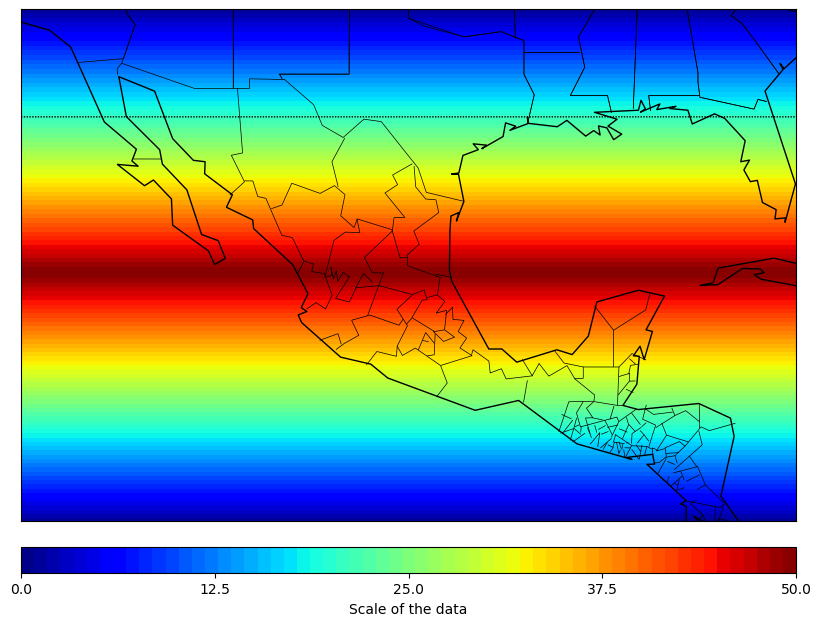

In [8]:
#  Special thx to:
# https://stackoverflow.com/questions/50939821/aligning-data-contourf-on-basemap

lowlon = -120 # lower corner longitude
lowlat = 10 # lower corner latitude
upplon = -80 # upper corner longitude
upplat = 35 # upper corner latitude

# data for z (2D array)
h2o_north = np.linspace(1, 50, num=90)
h2o_south = np.flipud(h2o_north)
h2o = np.append(h2o_north, h2o_south)
data = np.transpose(np.tile(h2o, (len(h2o_north), 1))) # tile repeats the array

# create figure and axes instances
fig = plt.figure(figsize=(10, 16))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(llcrnrlon = lowlon,
            llcrnrlat = lowlat,
            urcrnrlon = upplon,
            urcrnrlat = upplat,
            projection = 'mill', # Lambert conformal projection
            lat_0 = 19, # center lat
            lon_0 = -97.3, # center lon
            ax = ax
           )

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = np.linspace(10, 35, data.shape[0]) # where to plot data
lon = np.linspace(-120, -80, data.shape[1]) # where to plot data
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# draw filled contours
clevs = np.linspace(0, np.max(data), 60)
cs = m.contourf(x, y, data, clevs, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.drawmeridians(range(-10, 180, 30))
m.drawparallels(range(-90, 90, 30))

# draw colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%", ticks=np.linspace(0, np.max(data), 5))
cbar.set_label('Scale of the data')

plt.show()

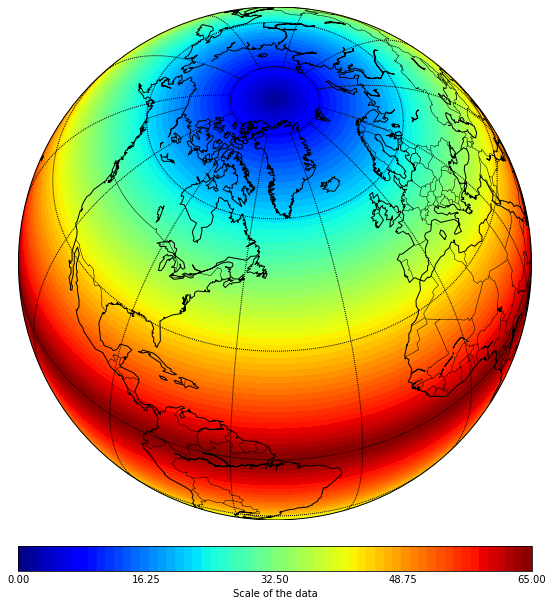

In [35]:
#  Special thx to:
# https://stackoverflow.com/questions/50939821/aligning-data-contourf-on-basemap

# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np

# data for z (2D array)
h2o_north = np.linspace(1, 65, num=90)
h2o_south = np.flipud(h2o_north)
h2o = np.append(h2o_north, h2o_south)
data = np.transpose(np.tile(h2o, (len(h2o_north), 1))) # tile repeats the array

# create figure and axes instances
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(projection='ortho', lon_0=-50, lat_0=50, resolution='c', ax=ax)

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = np.linspace(-90, 90, data.shape[0])
lon = np.linspace(-180, 180, data.shape[1])
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# draw filled contours
clevs = np.linspace(0, np.max(data), 60)
cs = m.contourf(x, y, data, clevs, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawcountries()

m.drawmeridians(range(-180, 180, 30))
m.drawparallels(range(-90, 90, 30))

# draw colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%", ticks=np.linspace(0, np.max(data), 5))
cbar.set_label('Scale of the data')

plt.show()

In [95]:
ad_data = pd.read_csv('MTWA_20180504_1200_Kp1_AsympDir_SEP80perc.txt', sep = ',', header = 0, engine = 'python')
# ad_data.info()
# 0 forbidden
# 1 allowed in magnetopause
# 2 undetermined
# 3 calculation with wrong step size
# 4 allowed in magnetotail
# gse (geocentered solar ecliptic) centered at Earth's center,x axis sunwards and z axis perpendicular to ecliptic
# gsm (geocentric solar magnetosferic) x axis sunwards and z axis along geomagnetic dipole projection
# geo x lies on greenwich and z is north pole
# tag neutron monitor (Mt.Washington or Nane)
# rig particle rigidity
# zen zenith angle
# azi azimuthal angle
ad_data = ad_data[ad_data.infi == 1].reset_index().filter(['algeo', 'apgeo', 'rig'])
ad_data['long_perrona'] = ad_data['apgeo'].apply(lambda long_culera: long_culera-360 if long_culera > 180 else long_culera)
ad_data

,algeo,apgeo,rig,long_perrona
0,-1.783,218.0,1765,-142.0
1,5.597,216.7,1770,-143.3
2,9.671,216.3,1808,-143.7
3,9.944,220.0,1830,-140.0
4,2.235,227.8,1843,-132.2
...,...,...,...,...
770,-15.760,359.1,5321,-0.9
771,-15.740,359.0,5326,-1.0
772,-15.700,358.9,5330,-1.1
773,-10.270,350.2,6100,-9.8


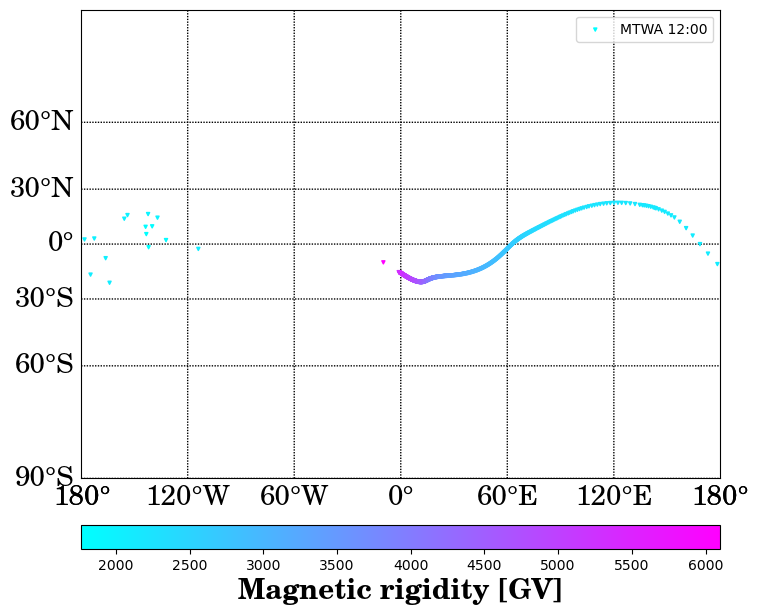

In [132]:
#  Special thx to:
# https://stackoverflow.com/questions/50939821/aligning-data-contourf-on-basemap

lowlon = -180 # lower corner longitude
lowlat = -90 # lower corner latitude
upplon = 180 # upper corner longitude
upplat = 90 # upper corner latitude

# create figure and axes instances
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(llcrnrlon = lowlon,
            llcrnrlat = lowlat,
            urcrnrlon = upplon,
            urcrnrlat = upplat,
            projection = 'mill', # Lambert conformal projection
            lat_0 = 0, # center lat
            lon_0 = 0, # center lon
            ax = ax
           )

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = np.linspace(lowlat, upplat, data.shape[0]) # where to plot data
lon = np.linspace(lowlon, upplon, data.shape[1]) # where to plot data
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# m.bluemarble()
m.drawparallels(np.arange(-90, 90, 30), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'k', linewidth = 1)
m.drawmeridians(np.arange(m.lonmin, m.lonmax + 30, 60),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'k', linewidth = 1)

x1, y1 = m(ad_data.long_perrona, ad_data.algeo)
scatterplot = m.scatter(x1, y1, c = ad_data.rig, marker = 'v',
                        cmap = 'cool', s=5, zorder = 100, label = 'MTWA 12:00')
plt.legend()
ax.tick_params(axis = 'both', which = 'both', direction = 'in', 
            labelsize = 23, color = 'k', width = 1.1, length = 10)

# draw filled contours
# clevs = np.linspace(0, np.max(ad_data['rig']), 250)
# cs = m.contourf(x1, y1, ad_data['rig'], clevs) # colormaps in https://matplotlib.org/stable/gallery/color/colormap_reference.html
# draw colorbar
cbar = m.colorbar(scatterplot, location='bottom', pad="10%")
cbar.set_label('Magnetic rigidity [GV]', fontsize=20,
          fontweight='bold', color="black", fontname = 'C059')

plt.show()

In [51]:
data.shape

(180, 90)

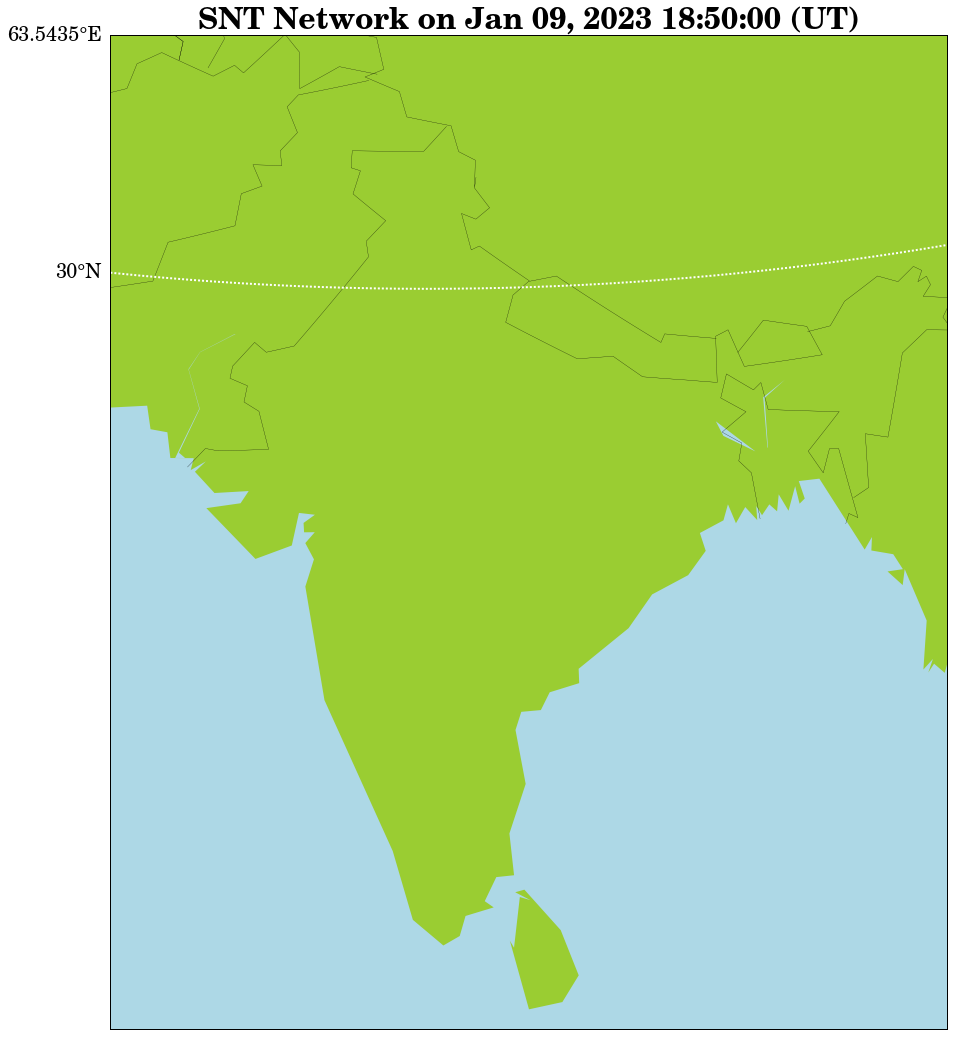

In [18]:
# Special thx to:
# https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot

fig0 = plt.figure(figsize = (15,20))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0])

map = Basemap(llcrnrlon = 67, # lower corner longitude
              llcrnrlat = 5, # lower corner latitude
              urcrnrlon = 99, # upper corner longitude
              urcrnrlat = 37, # upper corner latitude
              projection = 'lcc', # Lambert conformal projection
              lat_0 = 28, # center lat
              lon_0 = 77 # center lon
             )
# map.bluemarble() Mapa chingón pero pesado
map.drawcoastlines(linewidth = 0)
map.drawcountries(linewidth=0.25)
map.drawparallels(np.arange(-90, 90, 30), labels = [1, 0, 0, 1],
                  fontsize=20, fontname = 'C059', color = 'w', linewidth = 2)
map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60),
                  labels=[1, 0, 0, 1], fontsize=20, fontname = 'C059',
                  color = 'w', linewidth = 2)
map.fillcontinents(color='yellowgreen', lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
# CS=map.nightshade(d, color = 'slategray', alpha = 0.4)# Shade the night areas

# lats, lons, obs
coords = [
          [-97.3, 19.0, 'Sierra Negra, \nMexico'], 
          [-68.0, -16.2, 'Chacaltaya, \nBolivia'],
          [137.5, 36.1, 'Norikura, \nJapan'],
          [40.5, 44.2, 'Aragats, \nArmenia'],
          [-156.3, 19.8, 'Mauna Kea, \nUSA'],
          [90.5, 30, 'Tibet, \nChina'],
#           [7.8, 40.6, 'Gornergrat, \nSwitzerland']
         ]

# for lat, lon, obs in coords:
#     x,y = map(lat, lon)
#     map.scatter(x, y, color = 'red', marker = '*', s = 180, edgecolor = 'k')
#     plt.text(x*(1 + 0.01), y*(1 + 0.01), obs, color = 'black',
#              fontsize = 15, fontweight = 'bold')
# plt.title('Day/Night Map for %s (UT)' % d.strftime("%d %b %Y %H:%M:%S"),
plt.title(f'SNT Network on {d.strftime("%b %d, %Y %H:%M:%S")} (UT)',
      fontsize = 30, fontweight = 'bold', color = "black", fontname = 'C059')
# plt.ylabel('Long. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 
# plt.xlabel('Lat. [°]', fontweight='bold', fontsize = 21, fontname = 'C059') 

# plt.savefig('SNT_Network_Map.png', dpi = 'figure', bbox_inches= 'tight')

plt.show()